# Assignment 3
### Filip Sjövall 19950308



## Task 1
The task is to find a polynomial representation of some sample data using the least squares method. The residual $r = Ax-b$ will be minimized if it is orthogonal to the column space of $A$ / range($A$),m i.e. $A^T r = 0$. This gives us the normal form $A^T A x = A^T b$ for which we will seek a solution in this task.


The input data is modelled by
\begin{equation}
y(x) = a sin(x) + b cos(x) + c sin(2x) + dcos(2x)
\end{equation}
where $a,b,c,d$ are the unknowns. Given the sample data $(x_i,y_i)$ the following system of equations models the solution
\begin{equation}
Ax = y 
\label{eq:lsq_sys}
,
\end{equation}
where $ x = (a,b,c,d)^T $, y the sampled data $y_i$ and 
\begin{equation}
A =
\begin{bmatrix}
sin(x_1) & cos(x_1) & sin(2x_1) & cos(2x_1) \\
sin(x_2) & cos(x_2) & sin(2x_2) & cos(2x_2) \\
. & . & . & . \\
. & . & . & . \\
. & . & . & . \\
sin(x_n) & cos(x_n) & sin(2x_n) & cos(2x_n) \\
\end{bmatrix}.
\end{equation}
The idea is to solve the system (\ref{eq:lsq_sys}) not using $A^{-1}$ which is expensive but instead using QR or SVD. To get square matrices we can multiply from the left to get
\begin{equation}\label{eq:}
A^T A x = A^T y = b,
\end{equation}
so then $QR(A^T A)$ gives us 
\begin{align}
QR x &= b, \\
R  x &= Q^T b, 
\end{align}
which can be solved using backwards substitution. Similarly for the SVD(A^T A) we get
\begin{align}
U\Sigma V^T x &= b , \\
            x &= V \Sigma ^ {-1} U^T b
\end{align}
which is also straight forward to solve ($\Sigma$ is diagonal so the inverse is diag(1/\sigma_i...)) and the remaining matrix vector products are also straight forward. The cost of solving $\ref{eq:lsq_sys}$ using the above described methods are in both cases dominated by the factorization as the rest is matrix-vector multiplications or backwards substitution.
Något om hur r vinkelrät mot range(A)  och A^Tr=0

In [214]:
from numpy import *
#from scipy import *
from numpy import linalg
#from scipy import linalg
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import math
import sys, getopt, os, string

In [215]:
# Open file and create vectors x and y
file = open('/home/filip/Documents/NumLinAlg/Assignment 3/signal.dat','r')
x0 = []
y = []
for row, line in enumerate(file, 1):
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    x0.append(float64(fname[0]))
    y.append(float64(fname[1]))

In [244]:
# Create A for the linear system
A0 = zeros([len(x0),4])
for i, xi in enumerate(x0, 1 ):
    A0[int(i)-1,:] = [sin(xi),cos(xi),sin(2*xi),cos(2*xi)]

The system is solved both with QR factorization and with Singular value decomposition

(200, 4)


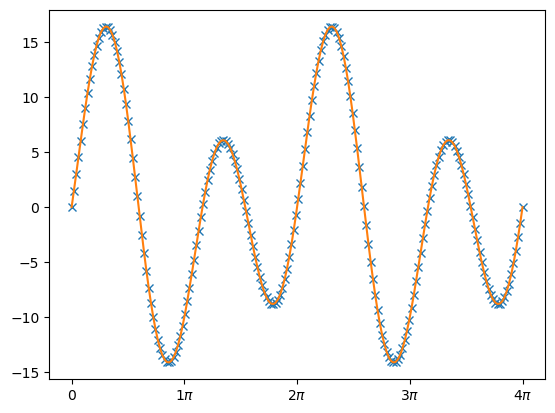

1778.7782869889143

In [218]:
print(shape(A0))
A = A0.T@A0
b0 = A0.T@y
Q,R = linalg.qr(A)

b = Q@b0

#System solution, could probably find a closed form solution to loop over for models with more parameters in x
x     = zeros([4,1])
x[3] =   b[3]/R[3,3]
x[2]  = (b[2] - R[2,3]*x[3] )/R[2,2]
x[1]  = (b[1] - R[1,2]*x[2] - R[1,3]*x[3] )/R[1,1]
x[0]  = (b[0] - R[0,1]*x[1] - R[0,2]*x[2] - R[0,3]*x[3] )/R[0,0]

# Visualize result
f,ax=plt.subplots(1)
ax.plot(array(x0),y,'x')
ax.plot(x0,A0@x)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.show()

linalg.norm(A0@x-y,2)

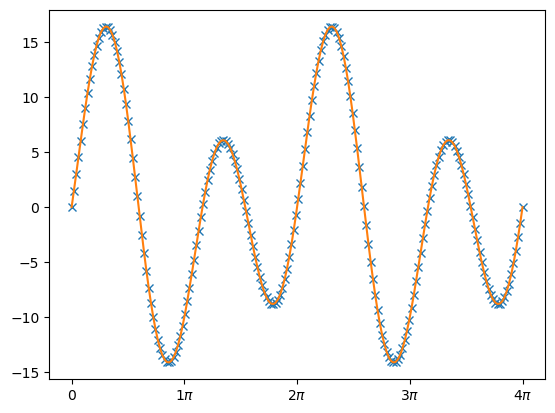

1778.7782869889138

In [220]:
U,S,V = linalg.svd(A, full_matrices=True)


# Solve: S w = U b
b2 = U.T@b0
w  = zeros([4,1])
x = w
for i in range(0,4):
    w[i] = b2[i]/S[i]
x = V.T@w


# Visualize result
f,ax=plt.subplots(1)
ax.plot(array(x0),y,'x')
ax.plot(array(x0),A0@x)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.show()

linalg.norm(A0@x-y,2)

# Task 2

Condition number for solving the equation $Ax=b$. We consider perturbations in the solution $\delta x$ caused by perturbations in the RHS $\delta b$ i.e. $A(x+\delta x)=b + \delta$. Since $Ax=b$ we should have $A\delta x=\delta b$. Using SVD we get
\begin{align}
    U\Sigma V^T x &= b \\
    x &= V \Sigma^{-1} U^T b.
\end{align}
if $b$ is a left singular vector $b = u_j$ the RHS becomes $v_j \frac{1}{\sigma_j}$ so the norm becomes
\begin{align}
    || x  || &= || \frac{1}{\sigma_j} v_j || = \frac{1}{\sigma_j} ||v_j||.
\end{align}
Similarly if we use $\delta x = \delta b = \delta u_k = \varepsilon u_k$ we get
\begin{align}
    ||\delta x || = \frac{\varepsilon}{\sigma_k} ||v_k||.
\end{align}
Now if we choose $b=u_1$ and $\delta b = \varepsilon u_n$ and we arrive at the qoutient
\begin{align}
\frac{|| \delta x ||}{|| x ||} = \varepsilon \kappa(A),
\end{align}
so we have found a vector pair $(b,\delta b)$ for which the bound
\begin{equation}
     \frac{|| \delta x ||}{|| x ||} \geq \kappa (A) \frac{|| \delta b ||}{|| b ||},
     \label{eq:bound}
\end{equation}
is tight.

# Task 3
A "worst case" vector pair is when the bound in (\ref{eq:bound}) is tight. TThus we compare $x=A^{-1}b$ and $x + \delta x = A^{-1}(b+\delta b)$.

In [240]:
from scipy import linalg as sl
H = sl.hilbert(50)
U,S,V = linalg.svd(copy(H))
b = U[:,0]
db= b + U[:,-1]
x_0 = sl.invhilbert(50)@b
x_1 = sl.invhilbert(50)@db
linalg.norm(x_1-x_0,2)

1.3740438898204339e+73

# Task 4
Sylvesters criterion. A symmetric positive definite matrix (SPD) $A$ is defined 
\begin{equation}
x^T A x > 0 \quad \forall x \neq \boldsymbol{0} 
\end{equation}
We consider the SPD matrix A of dimension $nxn$
\begin{equation}
A = \begin{bmatrix}
    a_11 & w^T \\
    w    & A_1
    \end{bmatrix},
\end{equation}
where $a_11$ has dimension 1, w $n-1$ and $A_1$ is $(n-1)x(n-1)$.
To show that $a_{11}$ is positive if $A$ is positive we consider the vector $x_1=(\hat{x},\boldsymbol{0})$, where $\boldsymbol{0}$ is the zero vector of dimension $n-1$ and $\hat{x} \neq 0$. Then, by the definition of an SPD matrix we have 
\begin{equation}
x^T A x = \hat{x}^T A \hat{x} > 0.
\end{equation}
In the same way we may consider $x_2=(0,\hat{x}_2)$ where $\hat{x}_2 \neq \boldsymbol{0}$ and again use the definited of an SPD to show that $A_1$ is SPD.

# Task 5
A strictly diagonally dominant matrix $A$ has the property
\begin{equation}
 a_{ii} = \sum_{j \neq i} a_{ij} \forall i.
 \label{eq:strict_def}
\end{equation}
To prove that A is nonsingular we consider 
\begin{equation}
 a_{ij}u_j = 0,
 \label{eq:au}
\end{equation}
which should only have solutions for $u_j=0$. (\ref{eq:au}) can be rewritten by subtracting the diagonal of $A$
\begin{equation}
 a_{ii} u_i = - \sum_{j \neq i}a_{ij}u_j ,
\end{equation}
so
\begin{equation}
 a_{ii} = - \sum_{j \neq i}a_{ij} \frac{u_j}{u_i},
\end{equation}
for which we may consider the norm
\begin{equation}
 | a_{ii} | = | \sum_{j \neq i}a_{ij} \frac{u_j}{u_i} | \leq 
              | \sum_{j \neq i}a_{ij}| | \sum_{j \neq i} \frac{u_j}{u_i} |
 .
 \label{eq:end proof}
\end{equation}
Now if there exist some $u_i \neq 0$ that has the largest absolute value in $u$ then (\ref{eq:end proof}) would contradict $\ref{eq:strict_def}$. On the other hand if all elements $u_i$ in $u_j$ have the same magnitude this would also be a contradiction as then $| \sum_{j \neq i} \frac{u_j}{u_i} | < 1$.